# Final Project Code 

## Members: 
### Lim Xinwei, Daniel
### Lau Shinn Yi
### Loo Jia Yi

# Section 1: Data Preparation and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import tree
from sklearn.metrics import confusion_matrix

from pycaret import classification
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir('D:\DBA3803 files')
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


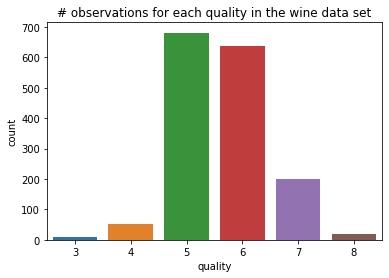

In [3]:
# let's first see the nummber of wine in this dataset that falls into each quality category
sns.countplot(x = 'quality', data = wine)
plt.title('# observations for each quality in the wine data set')
plt.show()

##  Correlation Matrix 

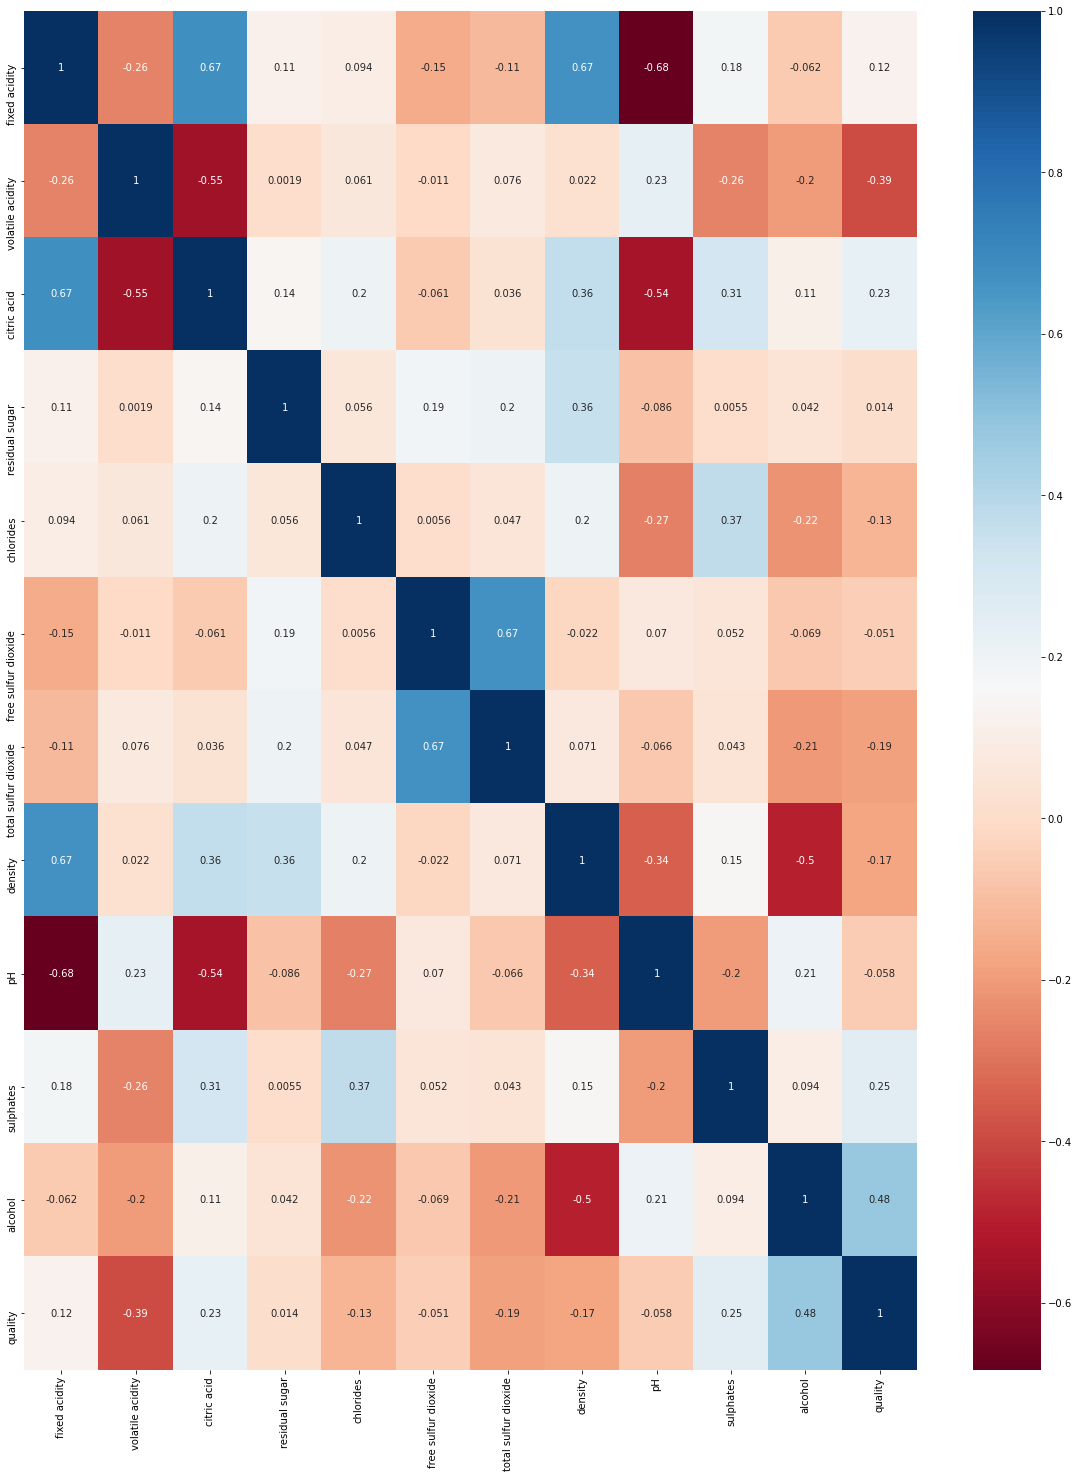

In [4]:
plt.figure(figsize=(20,25))
sns.heatmap(wine.corr(), annot=True,cmap='RdBu')
plt.show()

## Outlier Observations

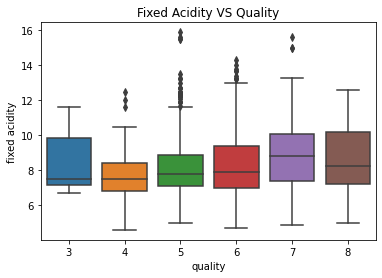

In [5]:
sns.boxplot(x='quality' , y='fixed acidity' , data=wine)
plt.title('Fixed Acidity VS Quality')
plt.show()

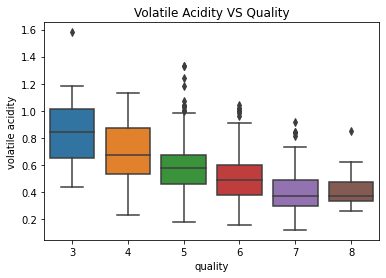

In [6]:
sns.boxplot(x='quality' , y='volatile acidity' , data=wine)
plt.title('Volatile Acidity VS Quality')
plt.show()

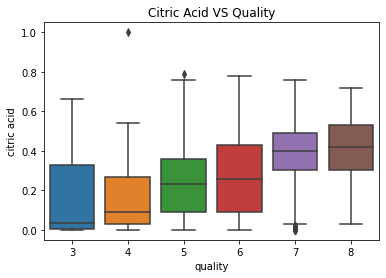

In [7]:
sns.boxplot(x='quality' , y='citric acid' , data=wine)
plt.title('Citric Acid VS Quality')
plt.show()

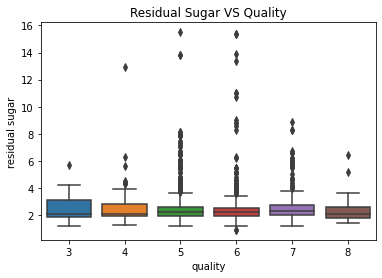

In [8]:
sns.boxplot(x='quality' , y='residual sugar' , data=wine)
plt.title('Residual Sugar VS Quality')
plt.show()

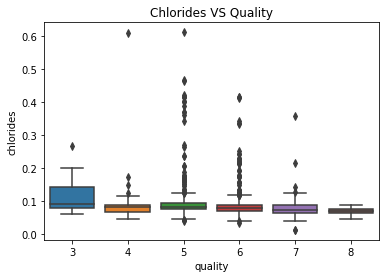

In [9]:
sns.boxplot(x='quality' , y='chlorides' , data=wine)
plt.title('Chlorides VS Quality')
plt.show()

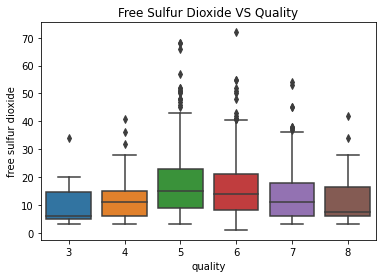

In [10]:
sns.boxplot(x='quality' , y='free sulfur dioxide' , data=wine)
plt.title('Free Sulfur Dioxide VS Quality')
plt.show()

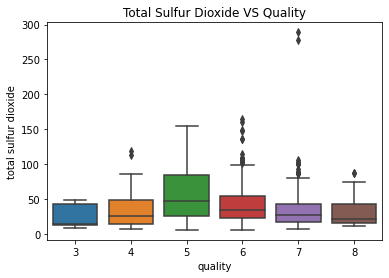

In [11]:
sns.boxplot(x='quality' , y='total sulfur dioxide' , data=wine)
plt.title('Total Sulfur Dioxide VS Quality')
plt.show()

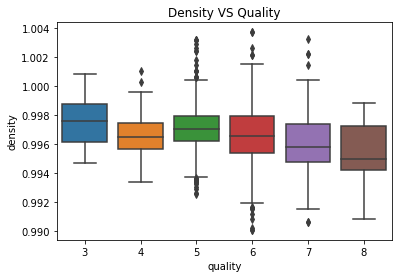

In [12]:
sns.boxplot(x='quality' , y='density' , data=wine)
plt.title('Density VS Quality')
plt.show()

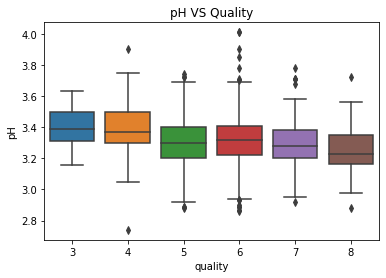

In [13]:
sns.boxplot(x='quality' , y='pH' , data=wine)
plt.title('pH VS Quality')
plt.show()

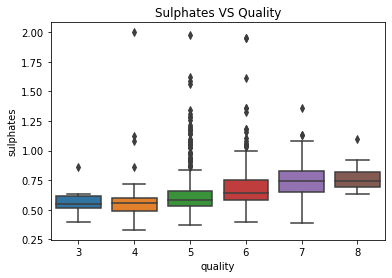

In [14]:
sns.boxplot(x='quality' , y='sulphates' , data=wine)
plt.title('Sulphates VS Quality')
plt.show()

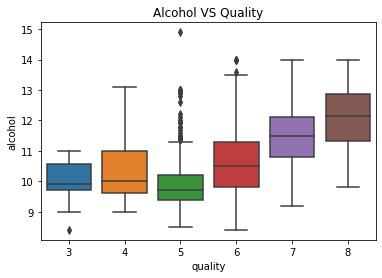

In [15]:
sns.boxplot(x='quality' , y='alcohol' , data=wine)
plt.title('Alcohol VS Quality')
plt.show()

# Section 2: Using Pycaret to conduct Classification

#### Setting Up Environment with Pycaret

In [16]:
#Setting up environment using Pycaret
class_setup = classification.setup(data = wine, target='quality',train_size = 0.7,session_id = 1)  

,Description,Value
0,session_id,1
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
#Compare performance of different Models with 10 folds 
class_all=classification.compare_models(sort='Accuracy', fold=10, exclude = ['ada','knn','nb','svm','rbfsvm','gpc','mlp','ridge','qda','lda','et','xgboost','lightgbm','catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6747,0.6692,0.3477,0.6481,0.6561,0.4759,0.4798,0.2120
gbc,Gradient Boosting Classifier,0.6479,0.6379,0.3449,0.6352,0.6377,0.4407,0.4432,0.3640
dt,Decision Tree Classifier,0.5908,0.5428,0.3728,0.5923,0.5889,0.3670,0.3683,0.0100
lr,Logistic Regression,0.5889,0.5967,0.2796,0.5534,0.5627,0.3253,0.3299,0.6430


##### Comparing the models, it would seem that Random Forest has the highest performing models, with best score in terms of Accuracy, Recall, F1, Kappa. It is a complex model with good performance but low interpretability. 
##### We will continue to explore on how to further improve the performance simpler models like logistic regression and decision tree with good interpretability.

# Section 2.1: Optimising Each Model with Train Data

#### Our group will be trying to optimise each model by hyperparameter tuning and adding new features through feature engineering.

## Section 2.1.1: Conducting Hyperparameter Tuning

### Model 1: Logistic Regression

In [18]:
#Build model with default hyperparameters
class_lr=classification.create_model('lr')

class_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6429,0.0000,0.3553,0.6005,0.6158,0.4159,0.4212
1,0.5893,0.7167,0.2753,0.5638,0.5684,0.3242,0.3280
2,0.5089,0.6843,0.2351,0.5019,0.4918,0.1867,0.1897
3,0.6339,0.8060,0.2716,0.5849,0.5972,0.3914,0.3989
4,0.6339,0.7844,0.2817,0.5965,0.6005,0.3915,0.3987
5,0.6429,0.8007,0.3096,0.6004,0.6189,0.4253,0.4285
6,0.5446,0.7180,0.2543,0.5135,0.5251,0.2603,0.2633
7,0.5893,0.7500,0.2559,0.5423,0.5534,0.3223,0.3290
8,0.5357,0.7071,0.2635,0.5084,0.5175,0.2476,0.2499
9,0.5676,0.0000,0.2938,0.5218,0.5387,0.2881,0.2922


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#Conduct hyperparameter tuning 
tuned_lr = classification.tune_model(class_lr, n_iter= 10, optimize = 'Accuracy')

#View the optimised tree and its respective hyperparameters 
print(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6339,0.0000,0.3511,0.5983,0.6109,0.4047,0.4089
1,0.5625,0.7346,0.2648,0.5431,0.5451,0.2813,0.2844
2,0.5357,0.6940,0.2611,0.5361,0.5227,0.2332,0.2364
3,0.6518,0.8015,0.2859,0.6040,0.6197,0.4249,0.4307
4,0.6250,0.7818,0.2865,0.5887,0.6013,0.3880,0.3915
5,0.6607,0.8044,0.3414,0.6349,0.6434,0.4706,0.4742
6,0.5446,0.7117,0.2707,0.5322,0.5368,0.2782,0.2794
7,0.6161,0.7646,0.2893,0.5844,0.5920,0.3737,0.3783
8,0.5625,0.7144,0.2890,0.5277,0.5428,0.3012,0.3035
9,0.6036,0.0000,0.3383,0.5722,0.5842,0.3552,0.3579


LogisticRegression(C=1.937, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Model 2: Decision Tree 

In [20]:
#Build model with default hyperparameters
class_dt=classification.create_model('dt')
class_dt

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6071,0.0000,0.5612,0.5926,0.5975,0.3818,0.3833
1,0.6250,0.7019,0.3362,0.6183,0.6201,0.4120,0.4134
2,0.6518,0.7301,0.3387,0.6407,0.6456,0.4563,0.4567
3,0.5625,0.6671,0.3249,0.5714,0.5659,0.3260,0.3265
4,0.5536,0.6476,0.3343,0.5589,0.5507,0.2997,0.3006
5,0.5625,0.6766,0.3106,0.5735,0.5632,0.3428,0.3451
6,0.5625,0.6535,0.3295,0.5577,0.5589,0.3099,0.3104
7,0.5625,0.6769,0.3051,0.5787,0.5686,0.3442,0.3458
8,0.5625,0.6740,0.2905,0.5718,0.5651,0.3358,0.3370
9,0.6577,0.0000,0.5971,0.6597,0.6532,0.4615,0.4638


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [21]:
#Conduct hyperparameter tuning 
tuned_dt = classification.tune_model(class_dt, n_iter= 10, optimize = 'Accuracy')

#View the optimised tree and its respective hyperparameters 
print(tuned_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5804,0.0000,0.2922,0.5774,0.5610,0.3479,0.3595
1,0.5714,0.7046,0.2683,0.5518,0.5613,0.3195,0.3199
2,0.6071,0.7059,0.3128,0.6119,0.6093,0.3896,0.3898
3,0.5625,0.7032,0.4807,0.5632,0.5545,0.2982,0.3004
4,0.6161,0.7645,0.3078,0.6058,0.6066,0.3848,0.3877
5,0.6161,0.8055,0.3063,0.5856,0.5875,0.3916,0.4033
6,0.4911,0.6143,0.2572,0.4873,0.4881,0.2101,0.2106
7,0.4911,0.6577,0.2382,0.4829,0.4861,0.2043,0.2046
8,0.4643,0.6373,0.2190,0.4411,0.4520,0.1545,0.1549
9,0.5766,0.0000,0.3326,0.5431,0.5554,0.3207,0.3244


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


### Model 3: Random Forest

In [22]:
#Build model with default hyperparameters
class_rf = classification.create_model('rf')
class_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6786,0.0000,0.4094,0.6502,0.6631,0.4863,0.4882
1,0.6696,0.8140,0.3319,0.6461,0.6540,0.4674,0.4716
2,0.6696,0.8279,0.3609,0.6449,0.6570,0.4770,0.4775
3,0.6696,0.8591,0.3090,0.6362,0.6467,0.4602,0.4650
4,0.7054,0.8617,0.3275,0.6970,0.6783,0.5109,0.5209
5,0.7143,0.8819,0.3551,0.6777,0.6921,0.5426,0.5476
6,0.6071,0.7920,0.3039,0.5727,0.5892,0.3709,0.3721
7,0.6607,0.8079,0.3231,0.6369,0.6434,0.4546,0.4586
8,0.6696,0.8472,0.3415,0.6394,0.6523,0.4722,0.4752
9,0.7027,0.0000,0.4141,0.6794,0.6854,0.5168,0.5213


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [23]:
#Conduct hyperparameter tuning 
tuned_rf = classification.tune_model(class_rf, n_iter= 10, optimize = 'Accuracy')

#View the optimised tree and its respective hyperparameters 
print(tuned_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6696,0.0000,0.3777,0.6318,0.6450,0.4600,0.4651
1,0.5982,0.7461,0.2720,0.5799,0.5749,0.3349,0.3404
2,0.6071,0.7688,0.3131,0.5912,0.5958,0.3626,0.3647
3,0.6429,0.8136,0.2970,0.6046,0.6194,0.4168,0.4204
4,0.6786,0.8236,0.2995,0.6729,0.6386,0.4607,0.4735
5,0.7054,0.8688,0.3513,0.6628,0.6775,0.5254,0.5337
6,0.6161,0.7511,0.2915,0.5840,0.5955,0.3763,0.3807
7,0.5982,0.7808,0.2893,0.5819,0.5810,0.3480,0.3517
8,0.5625,0.7549,0.2900,0.5388,0.5484,0.2979,0.2998
9,0.6396,0.0000,0.3551,0.6058,0.6126,0.4074,0.4143


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


### Model 4: Gradient Boosting

In [24]:
#Build model with default hyperparameters
class_gbc = classification.create_model('gbc')
class_gbc

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6250,0.0000,0.3653,0.6026,0.6115,0.3992,0.4014
1,0.5982,0.7423,0.2873,0.5881,0.5895,0.3569,0.3597
2,0.7143,0.8209,0.4390,0.7201,0.7126,0.5512,0.5515
3,0.7232,0.8415,0.3525,0.7026,0.7093,0.5547,0.5576
4,0.6250,0.8149,0.2864,0.6028,0.6018,0.3836,0.3890
5,0.6875,0.8551,0.3609,0.6854,0.6818,0.5203,0.5237
6,0.6071,0.7448,0.3127,0.5994,0.6017,0.3809,0.3823
7,0.6071,0.7631,0.3165,0.6146,0.6078,0.3905,0.3925
8,0.6339,0.7962,0.3271,0.6054,0.6178,0.4199,0.4224
9,0.6577,0.0000,0.4010,0.6313,0.6430,0.4501,0.4521


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [25]:
#Conduct hyperparameter tuning 
tuned_gbc = classification.tune_model(class_gbc, n_iter= 10, optimize = 'Accuracy')

#View the optimised tree and its respective hyperparameters 
print(tuned_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6786,0.0000,0.4094,0.6690,0.6688,0.4855,0.4897
1,0.6875,0.7904,0.3386,0.6594,0.6710,0.4954,0.4981
2,0.7054,0.8505,0.3754,0.6859,0.6953,0.5340,0.5345
3,0.6964,0.8403,0.3271,0.6747,0.6798,0.5085,0.5117
4,0.6964,0.8282,0.3487,0.6719,0.6802,0.5092,0.5125
5,0.7411,0.8864,0.3994,0.7386,0.7349,0.6009,0.6050
6,0.6339,0.7754,0.3150,0.6101,0.6215,0.4204,0.4212
7,0.6429,0.7889,0.3314,0.6476,0.6400,0.4432,0.4476
8,0.6607,0.8234,0.3382,0.6387,0.6463,0.4590,0.4624
9,0.7477,0.0000,0.5335,0.7321,0.7363,0.5982,0.6005


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.053, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=270,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Section 2.1.2: Feature Engineering (Feature Interaction and Ratio)
#### Setting Up New Environment with Pycaret
By rule-of-thumb, since there is no overfitting, we could explore adding more interaction features to improve the performance.

In [26]:
#Creation of features through interaction with variables
class_setup_2 = classification.setup(wine, target='quality',train_size = 0.7,session_id = 1, 
                                            feature_interaction = True, 
                                            feature_ratio = True, 
                                            interaction_threshold = 0.1) 

,Description,Value
0,session_id,1
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
#Compare performance of different Models with 10 folds 
class_all_2=classification.compare_models(sort='Accuracy', fold=10, exclude = ['ada','knn','nb','svm','rbfsvm','gpc','mlp','ridge','qda','lda','et','xgboost','lightgbm','catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6702,0.6689,0.3519,0.6447,0.6519,0.4697,0.4738,0.2410
gbc,Gradient Boosting Classifier,0.6577,0.6497,0.3356,0.6373,0.6443,0.4532,0.4558,1.3780
dt,Decision Tree Classifier,0.6015,0.5519,0.3296,0.6035,0.6007,0.3842,0.3853,0.0150
lr,Logistic Regression,0.5934,0.6029,0.3014,0.5688,0.5754,0.3419,0.3449,0.2030


# Section 2.2: Computing Optimised Models' Performance with Test Data


#### After trying to optimise all 6 models through hyperparameter tuning and feature engineering, we will now compute| the test scores for each model based on their optimised model.

## Section 2.2.1: Models with With Feature Engineering

In this section, these are the models that are found to have better performance in terms of Accuracy score when more features are added to the models. Hence, these models will maintain their new added features to compute the test scores.

### Model 1: Logistics Regression

In [28]:
#Build model with default hyperparameters
class_lr_test=classification.create_model('lr')
class_lr_test

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6429,0.0000,0.3740,0.6142,0.6261,0.4245,0.4267
1,0.5625,0.7314,0.2575,0.5430,0.5429,0.2793,0.2835
2,0.5357,0.7011,0.2541,0.5484,0.5259,0.2403,0.2434
3,0.6607,0.7940,0.3126,0.6289,0.6405,0.4471,0.4504
4,0.6161,0.7759,0.2745,0.5683,0.5873,0.3701,0.3740
5,0.6429,0.8326,0.3695,0.6177,0.6272,0.4383,0.4407
6,0.5536,0.7200,0.2829,0.5291,0.5380,0.2840,0.2871
7,0.5804,0.7485,0.2751,0.5653,0.5648,0.3237,0.3271
8,0.5625,0.7256,0.2895,0.5322,0.5459,0.2995,0.3009
9,0.5766,0.0000,0.3244,0.5412,0.5557,0.3127,0.3152


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#Evaluate model using with test data

prediction_lr= classification.predict_model(class_lr_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6042,0.7555,0.2825,0.5691,0.5840,0.3477,0.3500


### Model 4: Gradient Boosting 

This model is found to have better performance after hyperparameter tuning, hence it will have both new features added and a tuned model.

In [30]:
#Build model with default hyperparameters
class_gbc_test = classification.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6518,0.0000,0.3228,0.6295,0.6391,0.4446,0.4464
1,0.6429,0.7856,0.3133,0.6333,0.6302,0.4203,0.4249
2,0.7143,0.8435,0.3789,0.6840,0.6982,0.5411,0.5428
3,0.7054,0.8442,0.3235,0.6717,0.6829,0.5210,0.5253
4,0.6161,0.8042,0.3076,0.5879,0.5985,0.3755,0.3781
5,0.6964,0.8664,0.3479,0.6791,0.6851,0.5241,0.5268
6,0.6250,0.7471,0.3118,0.6079,0.6136,0.4052,0.4081
7,0.6339,0.8122,0.3122,0.6357,0.6298,0.4244,0.4272
8,0.6161,0.7939,0.3193,0.5887,0.6018,0.3915,0.3924
9,0.6757,0.0000,0.4189,0.6553,0.6642,0.4843,0.4861


In [31]:
#Conduct hyperparameter tuning 
tuned_gbc_test = classification.tune_model(class_gbc_test, n_iter= 10, optimize = 'Accuracy')

#View the optimised tree and its respective hyperparameters 
print(tuned_gbc_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7054,0.0000,0.4314,0.6771,0.6893,0.5306,0.5333
1,0.6429,0.7973,0.3212,0.6325,0.6296,0.4201,0.4268
2,0.7232,0.8406,0.3833,0.7023,0.7115,0.5592,0.5611
3,0.6964,0.8583,0.3271,0.6745,0.6764,0.5037,0.5085
4,0.6429,0.8261,0.3187,0.6261,0.6295,0.4232,0.4257
5,0.7232,0.8788,0.3588,0.6865,0.7023,0.5589,0.5622
6,0.6250,0.7656,0.3116,0.5986,0.6108,0.4037,0.4051
7,0.6696,0.8303,0.3935,0.6709,0.6683,0.4890,0.4904
8,0.6786,0.8220,0.3595,0.6415,0.6584,0.4928,0.4949
9,0.7117,0.0000,0.6314,0.6855,0.6982,0.5443,0.5453


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.053, loss='deviance', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=270,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [32]:
#Evaluate model using with test data

prediction_gbc = classification.predict_model(tuned_gbc_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6667,0.8276,0.3741,0.6371,0.6499,0.4558,0.4579


## Section 2.2.2: Models Without Feature Engineering

In this section, these are the models that are found to have worst performance in terms of Accuracy score when more features are added to the models. Hence, these models will NOT have new added features to compute the test scores.

#### Setting Up new Environment without Feature Engineering

In [33]:
#Setting up environment using Pycaret
class_setup = classification.setup(data = wine, target='quality',train_size = 0.7,session_id = 1)  

,Description,Value
0,session_id,1
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Model 2: Decision Tree

In [34]:
#Evaluate model using with test data

prediction_dt= classification.predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5646,0.7076,0.2905,0.5591,0.5612,0.3129,0.3131


### Model 3: Random Forest

This model is found to have better performance after hyperparameter tuning, hence it will have both new features added and a tuned model.

In [35]:
#Build model with default hyperparameters
class_rf_test = classification.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6786,0.0000,0.4094,0.6502,0.6631,0.4863,0.4882
1,0.6696,0.8140,0.3319,0.6461,0.6540,0.4674,0.4716
2,0.6696,0.8279,0.3609,0.6449,0.6570,0.4770,0.4775
3,0.6696,0.8591,0.3090,0.6362,0.6467,0.4602,0.4650
4,0.7054,0.8617,0.3275,0.6970,0.6783,0.5109,0.5209
5,0.7143,0.8819,0.3551,0.6777,0.6921,0.5426,0.5476
6,0.6071,0.7920,0.3039,0.5727,0.5892,0.3709,0.3721
7,0.6607,0.8079,0.3231,0.6369,0.6434,0.4546,0.4586
8,0.6696,0.8472,0.3415,0.6394,0.6523,0.4722,0.4752
9,0.7027,0.0000,0.4141,0.6794,0.6854,0.5168,0.5213


In [36]:
#Conduct hyperparameter tuning 
tuned_rf_test = classification.tune_model(class_rf_test, n_iter= 10, optimize = 'Accuracy')

#View the optimised tree and its respective hyperparameters 
print(tuned_rf_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6696,0.0000,0.3777,0.6318,0.6450,0.4600,0.4651
1,0.5982,0.7461,0.2720,0.5799,0.5749,0.3349,0.3404
2,0.6071,0.7688,0.3131,0.5912,0.5958,0.3626,0.3647
3,0.6429,0.8136,0.2970,0.6046,0.6194,0.4168,0.4204
4,0.6786,0.8236,0.2995,0.6729,0.6386,0.4607,0.4735
5,0.7054,0.8688,0.3513,0.6628,0.6775,0.5254,0.5337
6,0.6161,0.7511,0.2915,0.5840,0.5955,0.3763,0.3807
7,0.5982,0.7808,0.2893,0.5819,0.5810,0.3480,0.3517
8,0.5625,0.7549,0.2900,0.5388,0.5484,0.2979,0.2998
9,0.6396,0.0000,0.3551,0.6058,0.6126,0.4074,0.4143


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [37]:
#Evaluate model using with test data

prediction_rf = classification.predict_model(tuned_rf_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6312,0.7906,0.2931,0.5937,0.6054,0.3845,0.3901


# Section 3: Final Model Selection

#### Our group has decided to use Random Forest given that it has the best performance in terms of Accuracy.

In [38]:
tuned_rf_test

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

# Saving Finalized Model

In [39]:
## We saved our feature engineered Random forest as regression_rf_test

# save transformation pipeline and model 
classification.save_model(tuned_rf_test, model_name = 'D:\DBA3803 files\wine_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=6, max_features='sqrt',
                                         max_le

In [40]:
wine_model = classification.load_model('wine_model')

Transformation Pipeline and Model Successfully Loaded


In [41]:
wine_model

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=6, max_features='sqrt',
                                        max_leaf_nodes=None, ma